In [1]:
import networkx as nx
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('/home/andrewngo/Desktop/LANL_data/redteam.txt', sep=",", names=["time","user","source","dest"])

In [3]:
df

,time,user,source,dest
0,150885,U620@DOM1,C17693,C1003
1,151036,U748@DOM1,C17693,C305
2,151648,U748@DOM1,C17693,C728
3,151993,U6115@DOM1,C17693,C1173
4,153792,U636@DOM1,C17693,C294
...,...,...,...,...
744,2552687,U655@DOM1,C17693,C828
745,2552687,U655@DOM1,C17693,C828
746,2552687,U655@DOM1,C17693,C828
747,2552687,U655@DOM1,C17693,C828


In [4]:
df.sort_values(by=['time'])

,time,user,source,dest
0,150885,U620@DOM1,C17693,C1003
1,151036,U748@DOM1,C17693,C305
2,151648,U748@DOM1,C17693,C728
3,151993,U6115@DOM1,C17693,C1173
4,153792,U636@DOM1,C17693,C294
...,...,...,...,...
744,2552687,U655@DOM1,C17693,C828
745,2552687,U655@DOM1,C17693,C828
746,2552687,U655@DOM1,C17693,C828
747,2552687,U655@DOM1,C17693,C828


In [5]:
users = df.user.unique()

In [6]:
len(users)

104

In [22]:
df.source.unique()

array(['C17693', 'C18025', 'C19932', 'C22409'], dtype=object)

In [23]:
df.user.unique()

array(['U620@DOM1', 'U748@DOM1', 'U6115@DOM1', 'U636@DOM1', 'U1723@DOM1',
       'U737@DOM1', 'U825@DOM1', 'U1653@DOM1', 'U293@DOM1', 'U8946@DOM1',
       'U10379@C3521', 'U8601@DOM1', 'U212@DOM1', 'U4978@DOM1',
       'U3905@DOM1', 'U995@DOM1', 'U288@DOM1', 'U2837@DOM1', 'U349@DOM1',
       'U250@DOM1', 'U1600@DOM1', 'U4353@DOM1', 'U4856@DOM1',
       'U5087@DOM1', 'U9763@DOM1', 'U795@DOM1', 'U9947@DOM1', 'U882@DOM1',
       'U8777@C583', 'U1450@DOM1', 'U8777@C1500', 'U8777@C3388',
       'U374@DOM1', 'U2575@DOM1', 'U3718@DOM1', 'U342@DOM1', 'U6572@DOM1',
       'U162@DOM1', 'U314@DOM1', 'U642@DOM1', 'U3635@DOM1', 'U1480@DOM1',
       'U66@DOM1', 'U1164@DOM1', 'U7394@DOM1', 'U1048@DOM1', 'U5254@DOM1',
       'U7375@DOM1', 'U4448@DOM1', 'U218@DOM1', 'U4112@DOM1', 'U12@DOM1',
       'U13@DOM1', 'U1289@DOM1', 'U3277@C2519', 'U1519@DOM1',
       'U7761@C2519', 'U7004@C2519', 'U207@DOM1', 'U1145@DOM1',
       'U453@DOM1', 'U9263@DOM1', 'U20@DOM1', 'U7507@DOM1', 'U415@DOM1',
       'U1569@D

In [25]:
df.dest.unique()

array(['C1003', 'C305', 'C728', 'C1173', 'C294', 'C5693', 'C152', 'C2341',
       'C332', 'C4280', 'C1493', 'C504', 'C148', 'C231', 'C721', 'C1567',
       'C612', 'C457', 'C17600', 'C2519', 'C1275', 'C1065', 'C2669',
       'C529', 'C395', 'C3153', 'C1610', 'C3521', 'C1124', 'C3199',
       'C11727', 'C754', 'C126', 'C9945', 'C1448', 'C1014', 'C20819',
       'C18626', 'C1222', 'C89', 'C1484', 'C8490', 'C3601', 'C1784',
       'C11194', 'C10577', 'C18872', 'C2597', 'C2609', 'C2849', 'C3422',
       'C42', 'C92', 'C16088', 'C886', 'C10817', 'C15232', 'C801',
       'C1015', 'C359', 'C21963', 'C1268', 'C353', 'C21814', 'C10005',
       'C20966', 'C853', 'C923', 'C11039', 'C1616', 'C583', 'C346',
       'C20203', 'C12448', 'C1500', 'C1479', 'C3388', 'C1461', 'C1119',
       'C19156', 'C18113', 'C19803', 'C17425', 'C9692', 'C7131', 'C8172',
       'C7503', 'C7597', 'C2578', 'C90', 'C1477', 'C4845', 'C3292',
       'C2914', 'C19356', 'C798', 'C302', 'C1125', 'C3437', 'C2648',
       'C6513

In [9]:
dests = df.dest.unique()

In [10]:
len(dests)

301

In [11]:
G = nx.Graph()
source2dest = list(zip(df.source, df.dest))
user2source = list(zip(df.user, df.source))

In [12]:
G.add_edges_from(source2dest)
# G.add_edges_from(edges_user2source[:10])

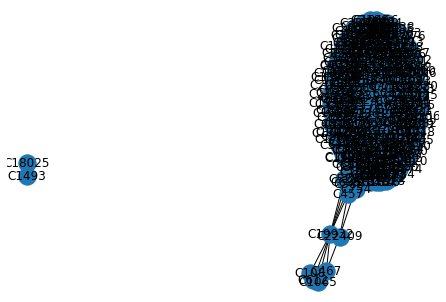

In [14]:
nx.draw(G, with_labels = True)
nx.write_gexf(G, "LANL_red_team.gexf")

In [15]:
print(G.degree["C17693"])

296


In [21]:
# print(G.degree)
sorted_degree = sorted(G.degree, key=lambda tup: tup[1], reverse=True)
sorted_degree

[('C17693', 296),
 ('C19932', 8),
 ('C457', 3),
 ('C22409', 3),
 ('C529', 2),
 ('C754', 2),
 ('C586', 2),
 ('C467', 2),
 ('C625', 2),
 ('C1003', 1),
 ('C305', 1),
 ('C728', 1),
 ('C1173', 1),
 ('C294', 1),
 ('C5693', 1),
 ('C152', 1),
 ('C2341', 1),
 ('C332', 1),
 ('C4280', 1),
 ('C18025', 1),
 ('C1493', 1),
 ('C504', 1),
 ('C148', 1),
 ('C231', 1),
 ('C721', 1),
 ('C1567', 1),
 ('C612', 1),
 ('C17600', 1),
 ('C2519', 1),
 ('C1275', 1),
 ('C1065', 1),
 ('C2669', 1),
 ('C395', 1),
 ('C3153', 1),
 ('C1610', 1),
 ('C3521', 1),
 ('C1124', 1),
 ('C3199', 1),
 ('C11727', 1),
 ('C126', 1),
 ('C9945', 1),
 ('C1448', 1),
 ('C1014', 1),
 ('C20819', 1),
 ('C18626', 1),
 ('C1222', 1),
 ('C89', 1),
 ('C1484', 1),
 ('C8490', 1),
 ('C3601', 1),
 ('C1784', 1),
 ('C11194', 1),
 ('C10577', 1),
 ('C18872', 1),
 ('C2597', 1),
 ('C2609', 1),
 ('C2849', 1),
 ('C3422', 1),
 ('C42', 1),
 ('C92', 1),
 ('C16088', 1),
 ('C886', 1),
 ('C10817', 1),
 ('C15232', 1),
 ('C801', 1),
 ('C1015', 1),
 ('C359', 1),
 ('C21

In [17]:
pageranks = nx.pagerank(G)

In [18]:
print(sorted(pageranks, key=lambda x: x[1], reverse=False))

['C17693', 'C1003', 'C1173', 'C152', 'C18025', 'C1493', 'C148', 'C1567', 'C19932', 'C17600', 'C1275', 'C1065', 'C1610', 'C1124', 'C11727', 'C126', 'C1448', 'C1014', 'C18626', 'C1222', 'C1484', 'C1784', 'C11194', 'C10577', 'C18872', 'C16088', 'C10817', 'C15232', 'C1015', 'C1268', 'C10005', 'C11039', 'C1616', 'C12448', 'C1500', 'C1479', 'C1461', 'C1119', 'C19156', 'C18113', 'C19803', 'C17425', 'C1477', 'C19356', 'C1125', 'C15197', 'C17806', 'C16467', 'C113', 'C19444', 'C12682', 'C1506', 'C12512', 'C1191', 'C1183', 'C1776', 'C1', 'C1215', 'C1006', 'C1022', 'C1737', 'C1710', 'C1797', 'C17636', 'C12320', 'C18190', 'C17860', 'C17776', 'C1944', 'C1732', 'C1028', 'C1823', 'C13713', 'C1952', 'C11178', 'C1415', 'C143', 'C1626', 'C1555', 'C1089', 'C1503', 'C1549', 'C1936', 'C1611', 'C12116', 'C1438', 'C1966', 'C1482', 'C102', 'C1042', 'C1964', 'C1961', 'C1570', 'C115', 'C1906', 'C1085', 'C16401', 'C1096', 'C17640', 'C1581', 'C1224', 'C1432', 'C1319', 'C1382', 'C18464', 'C1046', 'C1302', 'C1887', 

In [19]:
pageranks

{'C17693': 0.44248737866315857,
 'C1003': 0.0017628758616362516,
 'C305': 0.0017628758616362516,
 'C728': 0.0017628758616362516,
 'C1173': 0.0017628758616362516,
 'C294': 0.0017628758616362516,
 'C5693': 0.0017628758616362516,
 'C152': 0.0017628758616362516,
 'C2341': 0.0017628758616362516,
 'C332': 0.0017628758616362516,
 'C4280': 0.0017628758616362516,
 'C18025': 0.003278688524590164,
 'C1493': 0.003278688524590164,
 'C504': 0.0017628758616362516,
 'C148': 0.0017628758616362516,
 'C231': 0.0017628758616362516,
 'C721': 0.0017628758616362516,
 'C1567': 0.0017628758616362516,
 'C19932': 0.010637493075754925,
 'C612': 0.0016224530505860478,
 'C457': 0.004041493307197244,
 'C17600': 0.0017628758616362516,
 'C2519': 0.0017628758616362516,
 'C1275': 0.0017628758616362516,
 'C1065': 0.0016224530505860478,
 'C2669': 0.0017628758616362516,
 'C529': 0.002893525633533775,
 'C395': 0.0017628758616362516,
 'C3153': 0.0017628758616362516,
 'C1610': 0.0017628758616362516,
 'C3521': 0.00176287586163

In [44]:
def drawBipartite(setA, setB, edges):
    biG = nx.Graph()
    biG.add_nodes_from(setA, bipartite=0)
    biG.add_nodes_from(setB, bipartite=1)
    biG.add_edges_from(edges_user2source)
    nx.draw_networkx(
    biG,
    pos = nx.drawing.layout.bipartite_layout(biG, setA), 
    width = 5)

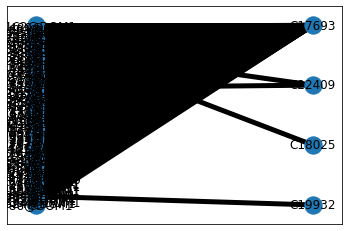

In [46]:
drawBipartite(users,sources,user2source)

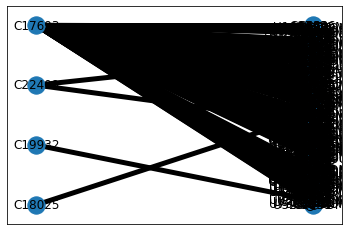

In [47]:
 drawBipartite(sources,dests,source2dest)